# 1. XGBoost (extreme Gradient Boosting) 

XGBoost is an advanced implementation of the gradient boosting algorithm. XGBoost has proved to be a highly effective ML algorithm, extensively used in machine learning competitions and hackathons. XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques. It also includes a variety of regularization which reduces overfitting and improves overall performance. Hence it is also known as ‘regularized boosting‘ technique.

Let us see how XGBoost is comparatively better than other techniques:

    Regularization:
        Standard GBM implementation has no regularisation like XGBoost.
        Thus XGBoost also helps to reduce overfitting.
    Parallel Processing:
        XGBoost implements parallel processing and is faster than GBM .
        XGBoost also supports implementation on Hadoop.
    High Flexibility:
        XGBoost allows users to define custom optimization objectives and evaluation criteria adding a whole new dimension to the model.
    Handling Missing Values:
        XGBoost has an in-built routine to handle missing values.
    Tree Pruning:
        XGBoost makes splits up to the max_depth specified and then starts pruning the tree backwards and removes splits beyond which there is no positive gain.
    Built-in Cross-Validation:
        XGBoost allows a user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.
-----------------

# 1.1 Parameters

    nthread
        This is used for parallel processing and the number of cores in the system should be entered..
        If you wish to run on all cores, do not input this value. The algorithm will detect it automatically.
    eta
        Analogous to learning rate in GBM.
        Makes the model more robust by shrinking the weights on each step.
    min_child_weight
        Defines the minimum sum of weights of all observations required in a child.
        Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
    max_depth
        It is used to define the maximum depth.
        Higher depth will allow the model to learn relations very specific to a particular sample.
    max_leaf_nodes
        The maximum number of terminal nodes or leaves in a tree.
        Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
        If this is defined, GBM will ignore max_depth.
    gamma
        A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
        Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.
    subsample
        Same as the subsample of GBM. Denotes the fraction of observations to be randomly sampled for each tree.
        Lower values make the algorithm more conservative and prevent overfitting but values that are too small might lead to under-fitting.
    colsample_bytree
        It is similar to max_features in GBM.
        Denotes the fraction of columns to be randomly sampled for each tree.


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from KUtils.eda import chartil

from xgboost.sklearn import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, recall_score, precision_score

In [2]:
adult_income_df = pd.read_csv('cleaned.csv')

In [3]:
# encode categorical variables using Label Encoder
# select all categorical variables
df_categorical = adult_income_df.select_dtypes(include=['object'])
df_categorical.head()

# apply Label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

# concat df_categorical with original df
adult_income_df = adult_income_df.drop(df_categorical.columns, axis=1)
adult_income_df = pd.concat([adult_income_df, df_categorical], axis=1)
adult_income_df.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,target
0,39,11.258240,13,2174,0,40,5,9,4,0,1,4,1,0,0
1,50,11.330336,13,0,0,13,4,9,2,3,0,4,1,0,0
2,38,12.281393,9,0,0,40,2,11,0,5,1,4,1,0,0
3,53,12.366153,7,0,0,40,2,1,2,5,0,2,1,0,0
4,28,12.732011,13,0,0,40,2,9,2,9,5,2,0,1,0
5,37,12.558777,14,0,0,40,2,12,2,3,5,4,0,0,0
6,49,11.984097,5,0,0,16,2,6,3,7,1,2,0,1,0
7,52,12.253157,9,0,0,45,4,11,2,3,0,4,1,0,1
8,31,10.731624,14,14084,0,50,2,12,4,9,1,4,0,0,1
9,42,11.979479,13,5178,0,40,2,9,2,3,0,4,1,0,1


In [4]:
from sklearn.preprocessing import StandardScaler
numerical_column_names = ['age','fnlwgt','education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()

adult_income_df[numerical_column_names] = scaler.fit_transform(adult_income_df[numerical_column_names])

C:\Users\keshav\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\keshav\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [5]:
# convert target variable income to categorical
adult_income_df['target'] = adult_income_df['target'].astype('category')

X = adult_income_df.drop('target', axis=1)
y = adult_income_df['target'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=43)

In [6]:
xgb_1 = XGBClassifier(objective= 'binary:logistic')
xgb_1.fit(X_train,y_train)

# Making predictions
y_pred_default = xgb_1.predict(X_test)

In [7]:
# Printing classification report
print(classification_report(y_test, y_pred_default))

local_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_default )

# Printing confusion matrix and accuracy
print('Confusion Matrix:')
print(local_confusion_matrix)

# Accuracy, precision, recall and f1 score
print('\nScores:')
accuracy = metrics.accuracy_score(y_test, y_pred_default)
precision = metrics.precision_score(y_test, y_pred_default)
recall = metrics.recall_score(y_test, y_pred_default)
f1_score = metrics.f1_score(y_test, y_pred_default)
roc_auc = metrics.roc_auc_score(y_test, y_pred_default)
sensitivity = recall
specificity =  local_confusion_matrix[0,0]/(local_confusion_matrix[0,0]+local_confusion_matrix[0,1])
print(" Accuracy {0:.3f}, \n Sensitivity {1:.3f}, \n Specificity {2:.3f}, \n Precision {3:.3f}, \n Recall {4:.3f}, \n f1_score {5:.3f}, \n roc_auc {6:.3f}".format(
    accuracy, sensitivity,specificity, precision,recall,f1_score,roc_auc))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6972
           1       0.77      0.60      0.68      2244

   micro avg       0.86      0.86      0.86      9216
   macro avg       0.83      0.77      0.79      9216
weighted avg       0.85      0.86      0.85      9216

Confusion Matrix:
[[6578  394]
 [ 900 1344]]

Scores:
 Accuracy 0.860, 
 Sensitivity 0.599, 
 Specificity 0.943, 
 Precision 0.773, 
 Recall 0.599, 
 f1_score 0.675, 
 roc_auc 0.771


# Hyperparameter Tuning

In [8]:
from KUtils.classifier import generic_classifier_utils as gcu

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   37.6s finished


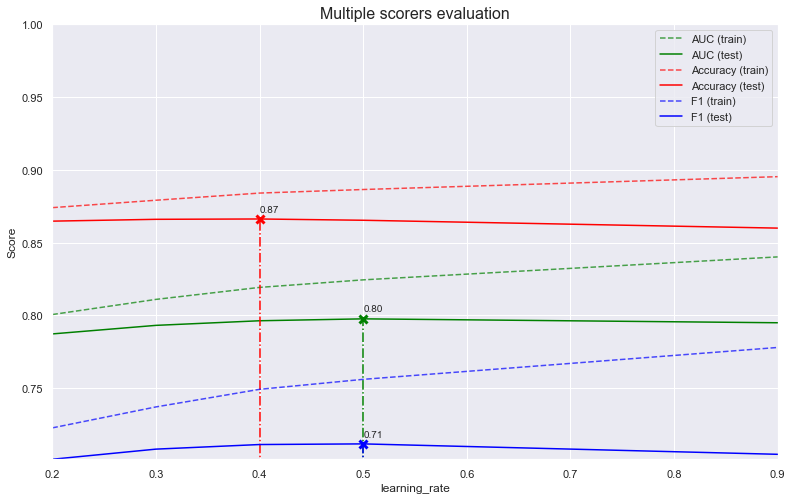

Best score 0.7976008581841193
Best Estimator XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [12]:
scores = gcu.single_hyperparameter_multiple_scoring_tuning(X_train, y_train,
                                                cv_folds=5, 
                                                hyper_parameter_name='learning_rate',
                                                hyper_parameter_range = [0.2, 0.3, 0.4, 0.5, 0.9],                                                
                                                classifier_algo=XGBClassifier(objective= 'binary:logistic'))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.9min finished


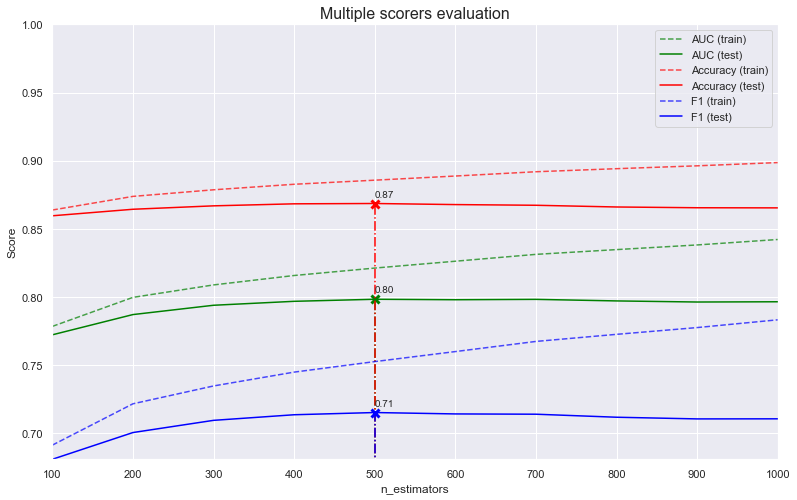

Best score 0.7981466333383691
Best Estimator XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [18]:
scores = gcu.single_hyperparameter_multiple_scoring_tuning(X_train, y_train,
                                                cv_folds=5, 
                                                hyper_parameter_name='n_estimators',
                                                hyper_parameter_range =  range(100, 1001, 100),                                                
                                                classifier_algo=XGBClassifier(objective= 'binary:logistic'))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.3min finished


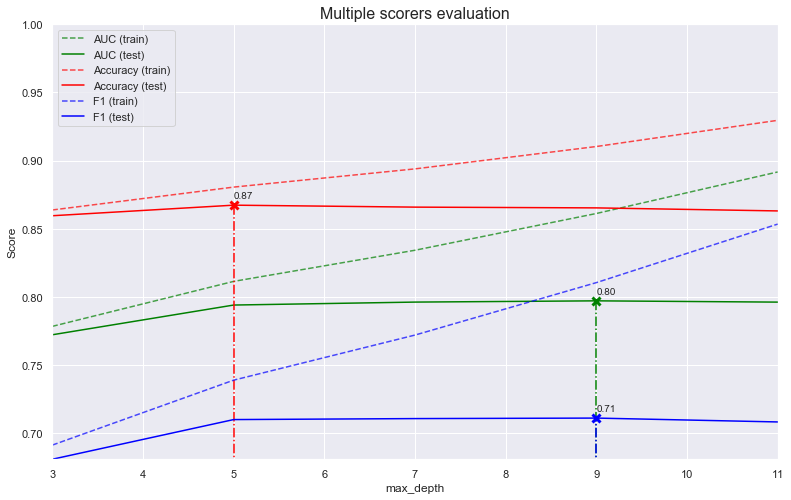

Best score 0.7969547923032017
Best Estimator XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=9, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [14]:
scores = gcu.single_hyperparameter_multiple_scoring_tuning(X_train, y_train,
                                                cv_folds=5, 
                                                hyper_parameter_name='max_depth',
                                                hyper_parameter_range =  range(3, 12, 2),                                                
                                                classifier_algo=XGBClassifier(objective= 'binary:logistic'))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   39.0s finished


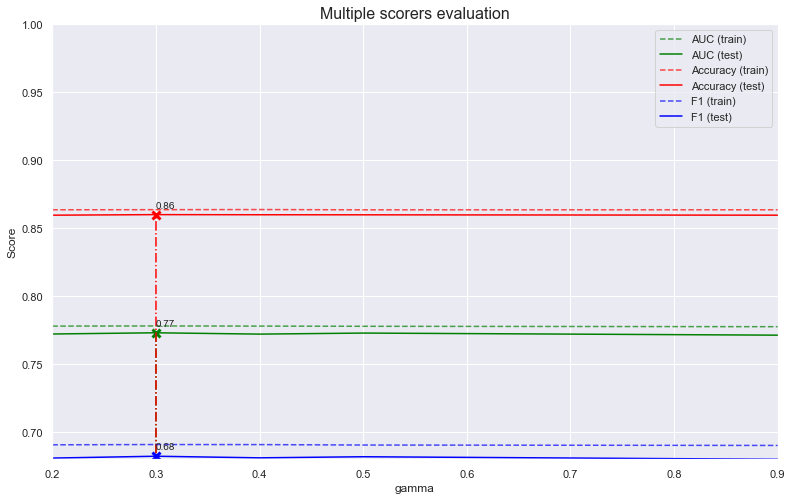

Best score 0.7728972058150891
Best Estimator XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.3, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [19]:
scores = gcu.single_hyperparameter_multiple_scoring_tuning(X_train, y_train,
                                                cv_folds=5, 
                                                hyper_parameter_name='gamma',
                                                hyper_parameter_range =  [0.2, 0.3, 0.4, 0.5, 0.9],                                                
                                                classifier_algo=XGBClassifier(objective= 'binary:logistic'))

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   52.8s finished


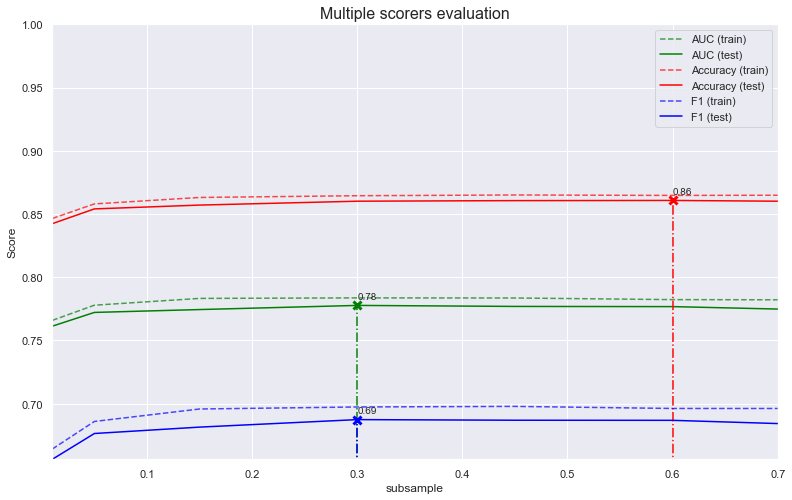

Best score 0.7777208454422436
Best Estimator XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.3)


In [20]:
scores = gcu.single_hyperparameter_multiple_scoring_tuning(X_train, y_train,
                                                cv_folds=5, 
                                                hyper_parameter_name='subsample',
                                                hyper_parameter_range = [0.01, 0.05, 0.15, 0.3, 0.45, 0.6, 0.7],                                                
                                                classifier_algo=XGBClassifier(objective= 'binary:logistic'))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   32.6s finished


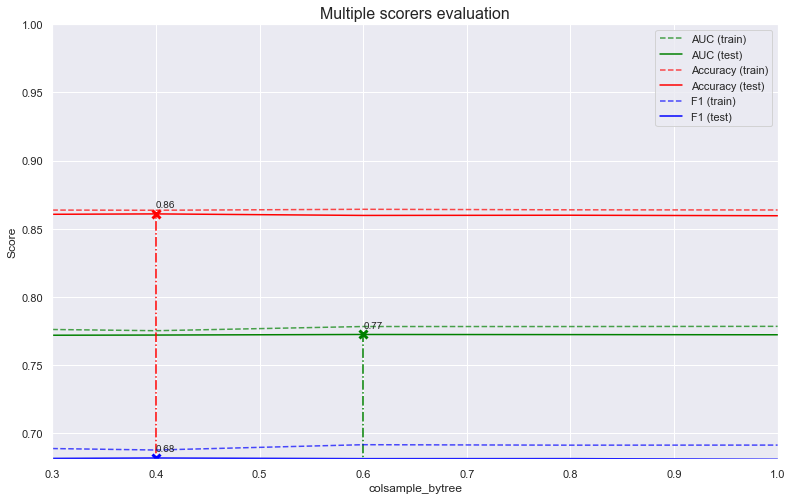

Best score 0.7722505305061005
Best Estimator XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [22]:
scores = gcu.single_hyperparameter_multiple_scoring_tuning(X_train, y_train,
                                                cv_folds=5, 
                                                hyper_parameter_name='colsample_bytree',
                                                hyper_parameter_range = [0.3, 0.4, 0.6, 0.8, 1],                                                
                                                classifier_algo=XGBClassifier(objective= 'binary:logistic'))

In [ ]:
learning_rate=0.5, n_estimators=500, max_depth=[5,9], gamma=0.3, subsample=[0.3, 0.6], colsample_bytree=[0.4, 0.6]

# Put it all together

In [39]:
from sklearn.metrics import roc_auc_score

### Try with multiple parameter (Grid Search to Find Optimal Hyperparameters) ###
n_folds = 5

param_grid = {
    'learning_rate': [0.5],
    'n_estimators': [500],
    'max_depth': [5,9],
    'gamma': [0.3], 
    'subsample': [0.3, 0.6],
    'colsample_bytree': [0.4, 0.6]
}
#model_scoring = {'AUC': make_scorer(roc_auc_score)}
model_scoring = {'Accuracy': make_scorer(accuracy_score)}
    
xgb_final = XGBClassifier(objective= 'binary:logistic')
grid_search = GridSearchCV(estimator = xgb_final, param_grid = param_grid, 
                           scoring=model_scoring,
                           cv = n_folds, n_jobs = -1,verbose = 1,
                          refit='Accuracy', return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.6min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,...,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy,split0_train_Accuracy,split1_train_Accuracy,split2_train_Accuracy,split3_train_Accuracy,split4_train_Accuracy,mean_train_Accuracy,std_train_Accuracy
0,9.891366,3.434110,0.214812,0.103905,0.4,0.3,0.5,5,500,0.3,...,0.833085,0.007640,5,0.929535,0.922683,0.925299,0.918847,0.923846,0.924042,0.003482
1,11.261244,4.357224,0.201412,0.086869,0.4,0.3,0.5,5,500,0.6,...,0.843177,0.005244,1,0.962733,0.958726,0.958377,0.957563,0.957796,0.959039,0.001892
2,14.671839,4.679808,0.312618,0.113441,0.4,0.3,0.5,9,500,0.3,...,0.824993,0.006962,7,0.984128,0.979944,0.980177,0.980932,0.980991,0.981234,0.001504
3,14.927854,3.810291,0.262415,0.090874,0.4,0.3,0.5,9,500,0.6,...,0.835550,0.005999,4,0.999884,0.999244,0.999302,0.999302,0.999361,0.999419,0.000235
4,12.094692,4.292462,0.193211,0.070119,0.6,0.3,0.5,5,500,0.3,...,0.830760,0.007212,6,0.939767,0.936868,0.940763,0.935473,0.936926,0.937959,0.001978


In [40]:
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8431773788484792
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0.3, learning_rate=0.5,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=500, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.6)


# Final model and its performance

In [9]:
xgb_final = XGBClassifier(objective= 'binary:logistic',
                         learning_rate=0.5, n_estimators=500, max_depth=5,
                          gamma=0.3, subsample=0.6, colsample_bytree=0.4)
xgb_final.fit(X_train, y_train)

# Making predictions
y_pred_default = xgb_final.predict(X_test)

In [10]:
# Printing classification report
print(classification_report(y_test, y_pred_default))

local_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_default )

# Printing confusion matrix and accuracy
print('Confusion Matrix:')
print(local_confusion_matrix)

# Accuracy, precision, recall and f1 score
print('\nScores:')
accuracy = metrics.accuracy_score(y_test, y_pred_default)
precision = metrics.precision_score(y_test, y_pred_default)
recall = metrics.recall_score(y_test, y_pred_default)
f1_score = metrics.f1_score(y_test, y_pred_default)
roc_auc = metrics.roc_auc_score(y_test, y_pred_default)
sensitivity = recall
specificity =  local_confusion_matrix[0,0]/(local_confusion_matrix[0,0]+local_confusion_matrix[0,1])
print(" Accuracy {0:.3f}, \n Sensitivity {1:.3f}, \n Specificity {2:.3f}, \n Precision {3:.3f}, \n Recall {4:.3f}, \n f1_score {5:.3f}, \n roc_auc {6:.3f}".format(
    accuracy, sensitivity,specificity, precision,recall,f1_score,roc_auc))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      6972
           1       0.71      0.67      0.69      2244

   micro avg       0.85      0.85      0.85      9216
   macro avg       0.80      0.79      0.80      9216
weighted avg       0.85      0.85      0.85      9216

Confusion Matrix:
[[6359  613]
 [ 745 1499]]

Scores:
 Accuracy 0.853, 
 Sensitivity 0.668, 
 Specificity 0.912, 
 Precision 0.710, 
 Recall 0.668, 
 f1_score 0.688, 
 roc_auc 0.790


In [11]:
y_pred_proba_default = xgb_final.predict_proba(X_test)
gnb_df = pd.DataFrame({'row_id':y_test.index , 'Actual':y_test.values,'gnb_proba':y_pred_proba_default[:,1]})
gnb_df.to_csv('xgb_df.csv', index=False)

[0.04919501 0.05665362 0.08692982 0.2105711  0.08420541 0.04479514
 0.03824415 0.03589809 0.09300119 0.04712041 0.15005262 0.03174729
 0.03971846 0.03186769]


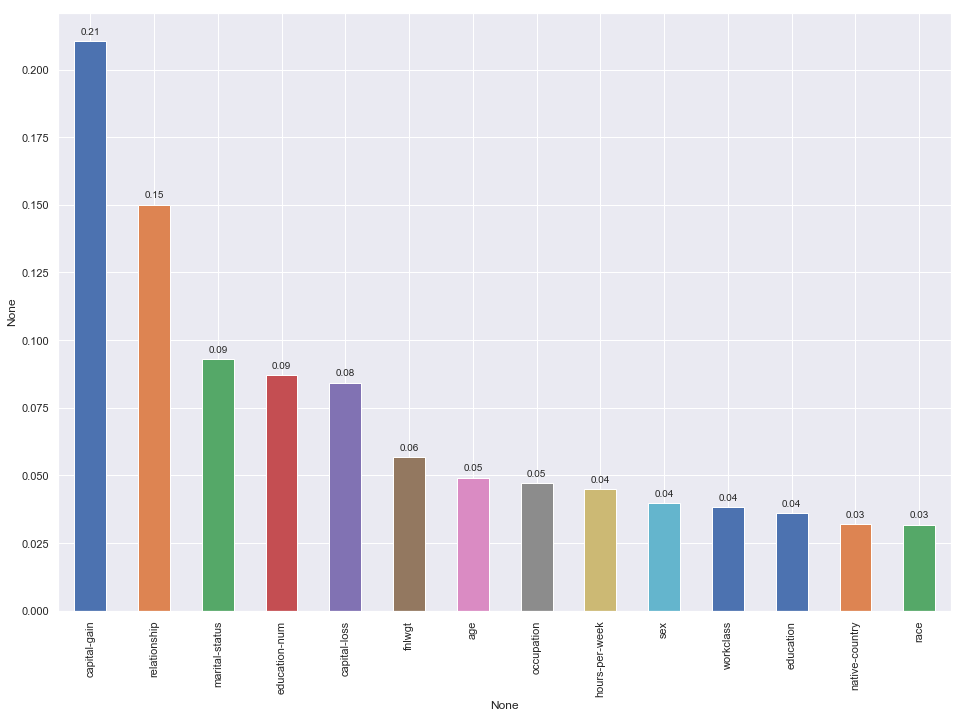

In [29]:
# Feature importance
importances = xgb_final.feature_importances_
print(importances)

unique_dict = dict(zip(X_train.columns, importances))

chartil.core_barchart_from_series(
    pd.Series(unique_dict), 
    optional_settings={'sort_by_value':True, 'decimal_precision':2}) 

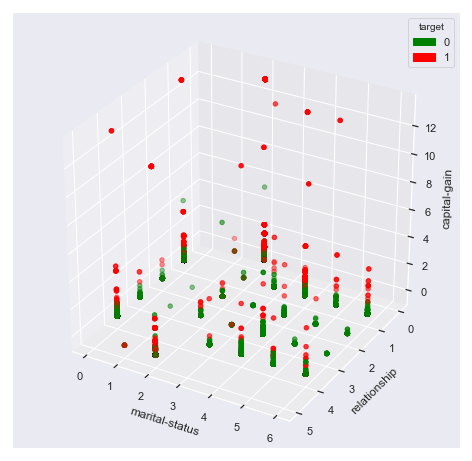

In [32]:
chartil.plot(adult_income_df, ['marital-status', 'relationship', 'capital-gain',  'target'])

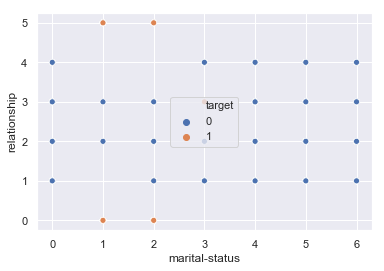

In [33]:
chartil.plot(adult_income_df, ['marital-status', 'relationship', 'target'])

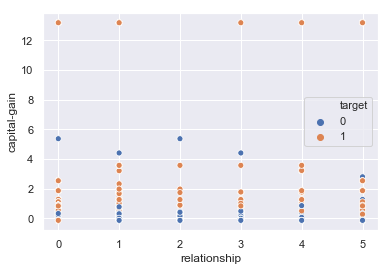

In [34]:
chartil.plot(adult_income_df, ['relationship', 'capital-gain',  'target'])

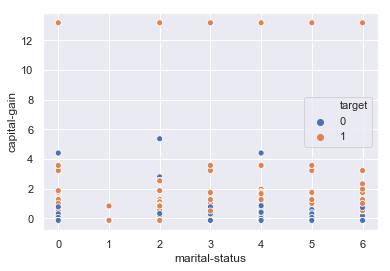

In [35]:
chartil.plot(adult_income_df, ['marital-status', 'capital-gain',  'target'])